<h1 style="color:#2471a3"><i><b>📊🔍 Exploratory Data Analysis</b></i></h1>


<h3 style="color:#a93226"><i><b>📦 Import Necessary Libraries</b></i></h3>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sqlite3
import re
import plotly.express as px

<h3 style="color:#a93226"><i><b>🔗📥 Connect to Database and Retrieve Data Using SELECT Queries</b></i></h3>


In [4]:
conn=sqlite3.connect(os.path.join("../data/clean/","imdb_movie_details.db"))

In [5]:
movies_df=conn.execute(
    '''
    SELECT 
        m.*, 
        g.genre_name, 
        w.writer_name, 
        l.language_name, 
        o.origin_country, 
        p.company_name
    FROM movies AS m
    LEFT JOIN Geners AS g ON m.movie_id = g.movie_id
    LEFT JOIN Writers AS w ON m.movie_id = w.movie_id
    LEFT JOIN Languages AS l ON m.movie_id = l.movie_id
    LEFT JOIN Origins AS o ON m.movie_id = o.movie_id
    LEFT JOIN Production_companys AS p ON m.movie_id = p.movie_id
    '''
).fetchall()


In [6]:
movies_df

[(0,
  'The Shawshank Redemption',
  'Frank Darabont',
  9.3,
  1994,
  '2h 22m',
  'A',
  25000000.0,
  28767189.0,
  29332133.0,
  727327.0,
  7,
  21,
  42,
  'Drama',
  'Frank Darabont',
  'English',
  'United States',
  'Castle Rock Entertainment'),
 (0,
  'The Shawshank Redemption',
  'Frank Darabont',
  9.3,
  1994,
  '2h 22m',
  'A',
  25000000.0,
  28767189.0,
  29332133.0,
  727327.0,
  7,
  21,
  42,
  'Drama',
  'Stephen King',
  'English',
  'United States',
  'Castle Rock Entertainment'),
 (0,
  'The Shawshank Redemption',
  'Frank Darabont',
  9.3,
  1994,
  '2h 22m',
  'A',
  25000000.0,
  28767189.0,
  29332133.0,
  727327.0,
  7,
  21,
  42,
  'Epic',
  'Frank Darabont',
  'English',
  'United States',
  'Castle Rock Entertainment'),
 (0,
  'The Shawshank Redemption',
  'Frank Darabont',
  9.3,
  1994,
  '2h 22m',
  'A',
  25000000.0,
  28767189.0,
  29332133.0,
  727327.0,
  7,
  21,
  42,
  'Epic',
  'Stephen King',
  'English',
  'United States',
  'Castle Rock Ent

<h3 style="color:#a93226"><i><b>Convert to DataFrame</b></i></h3>


In [7]:
movies_df=df = pd.DataFrame(movies_df, columns=['movie_id', 'title','directors','Imdb_Ratings', 'release_year', 'Runtime','Motion_picture_Rating','budgets(in millions)', 'gross_us_and_canada(in millions)','gross_worldwide(in millions)','opening_weekend_gross_in_uscanada(in millions)', 
                                 'Oscar','wins','nominations', 'genres', 'Writers', 'languages','origin_country', 'production_companys'])

In [8]:
def convert_to_millions(value):
    if pd.isna(value) or value == 0:
        return 0
    return int(value / 1_000_000)  


movies_df["budgets(in millions)"] = movies_df["budgets(in millions)"].apply(convert_to_millions)
movies_df["gross_us_and_canada(in millions)"] = movies_df["gross_us_and_canada(in millions)"].apply(convert_to_millions)
movies_df["gross_worldwide(in millions)"] = movies_df["gross_worldwide(in millions)"].apply(convert_to_millions)
movies_df["opening_weekend_gross_in_uscanada(in millions)"] = movies_df["opening_weekend_gross_in_uscanada(in millions)"].apply(convert_to_millions)


In [9]:
movies_df.shape

(27003, 19)

In [10]:
movies_df

,movie_id,title,directors,Imdb_Ratings,release_year,Runtime,Motion_picture_Rating,budgets(in millions),gross_us_and_canada(in millions),gross_worldwide(in millions),opening_weekend_gross_in_uscanada(in millions),Oscar,wins,nominations,genres,Writers,languages,origin_country,production_companys
0,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Drama,Frank Darabont,English,United States,Castle Rock Entertainment
1,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Drama,Stephen King,English,United States,Castle Rock Entertainment
2,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Epic,Frank Darabont,English,United States,Castle Rock Entertainment
3,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Epic,Stephen King,English,United States,Castle Rock Entertainment
4,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Period Drama,Frank Darabont,English,United States,Castle Rock Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Drama,Guillermo Arriaga,Spanish,Mexico,Zeta Film
26999,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Thriller,Guillermo Arriaga,Spanish,Mexico,Altavista Films
27000,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Thriller,Guillermo Arriaga,Spanish,Mexico,Zeta Film
27001,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Tragedy,Guillermo Arriaga,Spanish,Mexico,Altavista Films


In [11]:
conn.commit()

In [12]:
conn.close()

In [13]:
movies_df.columns

Index(['movie_id', 'title', 'directors', 'Imdb_Ratings', 'release_year',
       'Runtime', 'Motion_picture_Rating', 'budgets(in millions)',
       'gross_us_and_canada(in millions)', 'gross_worldwide(in millions)',
       'opening_weekend_gross_in_uscanada(in millions)', 'Oscar', 'wins',
       'nominations', 'genres', 'Writers', 'languages', 'origin_country',
       'production_companys'],
      dtype='object')

In [14]:
movies_df.dtypes

movie_id                                            int64
title                                              object
directors                                          object
Imdb_Ratings                                      float64
release_year                                        int64
Runtime                                            object
Motion_picture_Rating                              object
budgets(in millions)                                int64
gross_us_and_canada(in millions)                    int64
gross_worldwide(in millions)                        int64
opening_weekend_gross_in_uscanada(in millions)      int64
Oscar                                               int64
wins                                                int64
nominations                                         int64
genres                                             object
Writers                                            object
languages                                          object
origin_country

In [15]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27003 entries, 0 to 27002
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   movie_id                                        27003 non-null  int64  
 1   title                                           27003 non-null  object 
 2   directors                                       27003 non-null  object 
 3   Imdb_Ratings                                    27003 non-null  float64
 4   release_year                                    27003 non-null  int64  
 5   Runtime                                         27003 non-null  object 
 6   Motion_picture_Rating                           27003 non-null  object 
 7   budgets(in millions)                            27003 non-null  int64  
 8   gross_us_and_canada(in millions)                27003 non-null  int64  
 9   gross_worldwide(in millions)           

<h3 style="color:#a93226"><i><b>Datatype changing</b></i></h3>

In [16]:
movies_df['movie_id']=movies_df['movie_id'].astype('int32')
movies_df['Motion_picture_Rating']=movies_df['Motion_picture_Rating'].astype('category')

In [17]:
movies_df

,movie_id,title,directors,Imdb_Ratings,release_year,Runtime,Motion_picture_Rating,budgets(in millions),gross_us_and_canada(in millions),gross_worldwide(in millions),opening_weekend_gross_in_uscanada(in millions),Oscar,wins,nominations,genres,Writers,languages,origin_country,production_companys
0,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Drama,Frank Darabont,English,United States,Castle Rock Entertainment
1,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Drama,Stephen King,English,United States,Castle Rock Entertainment
2,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Epic,Frank Darabont,English,United States,Castle Rock Entertainment
3,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Epic,Stephen King,English,United States,Castle Rock Entertainment
4,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Period Drama,Frank Darabont,English,United States,Castle Rock Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26998,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Drama,Guillermo Arriaga,Spanish,Mexico,Zeta Film
26999,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Thriller,Guillermo Arriaga,Spanish,Mexico,Altavista Films
27000,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Thriller,Guillermo Arriaga,Spanish,Mexico,Zeta Film
27001,245,Amores perros,Alejandro G. Iñárritu,8.0,2000,2h 19m,A,2,5,20,0,1,55,24,Tragedy,Guillermo Arriaga,Spanish,Mexico,Altavista Films


In [18]:
movies_df.dtypes

movie_id                                             int32
title                                               object
directors                                           object
Imdb_Ratings                                       float64
release_year                                         int64
Runtime                                             object
Motion_picture_Rating                             category
budgets(in millions)                                 int64
gross_us_and_canada(in millions)                     int64
gross_worldwide(in millions)                         int64
opening_weekend_gross_in_uscanada(in millions)       int64
Oscar                                                int64
wins                                                 int64
nominations                                          int64
genres                                              object
Writers                                             object
languages                                           obje

In [19]:
movies_df.describe()

,movie_id,Imdb_Ratings,release_year,budgets(in millions),gross_us_and_canada(in millions),gross_worldwide(in millions),opening_weekend_gross_in_uscanada(in millions),Oscar,wins,nominations
count,27003.000000,27003.000000,27003.000000,27003.000000,27003.000000,27003.000000,27003.000000,27003.000000,27003.000000,27003.000000
mean,110.210754,8.346443,2000.673407,71.324297,170.462430,452.581306,40.153835,2.781284,67.134615,89.549235
std,71.014113,0.260433,18.306547,79.127105,191.420754,574.450270,70.593678,2.392742,76.100442,89.272559
min,0.000000,8.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,53.000000,8.100000,1993.000000,18.000000,32.000000,47.000000,0.000000,1.000000,15.000000,23.000000
50%,110.000000,8.300000,2003.000000,40.000000,85.000000,230.000000,8.000000,2.000000,43.000000,61.000000
75%,173.000000,8.500000,2015.000000,95.000000,282.000000,714.000000,50.000000,4.000000,85.000000,124.000000
max,245.000000,9.300000,2024.000000,356.000000,858.000000,2799.000000,357.000000,11.000000,355.000000,369.000000


In [20]:
movies_df['movie_id'].describe()

count    27003.000000
mean       110.210754
std         71.014113
min          0.000000
25%         53.000000
50%        110.000000
75%        173.000000
max        245.000000
Name: movie_id, dtype: float64

In [21]:
movies_df['title'].describe()

count            27003
unique             246
top       Blade Runner
freq              1008
Name: title, dtype: object

In [22]:
movies_df['directors'].describe()

count                 27003
unique                  152
top       Christopher Nolan
freq                   2178
Name: directors, dtype: object

In [23]:
movies_df['Writers'].describe()

count                 26999
unique                  430
top       Christopher Nolan
freq                    869
Name: Writers, dtype: object

In [24]:
movies_df['Imdb_Ratings'].describe()

count    27003.000000
mean         8.346443
std          0.260433
min          8.000000
25%          8.100000
50%          8.300000
75%          8.500000
max          9.300000
Name: Imdb_Ratings, dtype: float64

In [25]:
movies_df['release_year'].describe()

count    27003.000000
mean      2000.673407
std         18.306547
min       1921.000000
25%       1993.000000
50%       2003.000000
75%       2015.000000
max       2024.000000
Name: release_year, dtype: float64

In [26]:
movies_df['Runtime'].describe()

count     27003
unique      100
top       2h 9m
freq       1503
Name: Runtime, dtype: object

In [27]:
movies_df['Motion_picture_Rating'].describe()

count     27003
unique       14
top          UA
freq       8851
Name: Motion_picture_Rating, dtype: object

In [28]:
movies_df['budgets(in millions)'].describe()

count    27003.000000
mean        71.324297
std         79.127105
min          0.000000
25%         18.000000
50%         40.000000
75%         95.000000
max        356.000000
Name: budgets(in millions), dtype: float64

In [29]:
movies_df['gross_us_and_canada(in millions)'].describe()

count    27003.000000
mean       170.462430
std        191.420754
min          0.000000
25%         32.000000
50%         85.000000
75%        282.000000
max        858.000000
Name: gross_us_and_canada(in millions), dtype: float64

In [30]:
movies_df['gross_worldwide(in millions)'].describe()

count    27003.000000
mean       452.581306
std        574.450270
min          0.000000
25%         47.000000
50%        230.000000
75%        714.000000
max       2799.000000
Name: gross_worldwide(in millions), dtype: float64

In [31]:
movies_df['opening_weekend_gross_in_uscanada(in millions)'].describe()

count    27003.000000
mean        40.153835
std         70.593678
min          0.000000
25%          0.000000
50%          8.000000
75%         50.000000
max        357.000000
Name: opening_weekend_gross_in_uscanada(in millions), dtype: float64

In [32]:
movies_df['languages'].describe()

count       25608
unique         49
top       English
freq        11195
Name: languages, dtype: object

In [33]:
movies_df['origin_country'].describe()

count             26832
unique               58
top       United States
freq              12366
Name: origin_country, dtype: object

In [34]:
movies_df['production_companys'].describe()

count            24420
unique             256
top       Warner Bros.
freq              2090
Name: production_companys, dtype: object

In [35]:
movies_df['Oscar'].describe()

count    27003.000000
mean         2.781284
std          2.392742
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         11.000000
Name: Oscar, dtype: float64

In [36]:
movies_df['wins'].describe()

count    27003.000000
mean        67.134615
std         76.100442
min          1.000000
25%         15.000000
50%         43.000000
75%         85.000000
max        355.000000
Name: wins, dtype: float64

In [37]:
movies_df['nominations'].describe()

count    27003.000000
mean        89.549235
std         89.272559
min          0.000000
25%         23.000000
50%         61.000000
75%        124.000000
max        369.000000
Name: nominations, dtype: float64

In [38]:
movies_df['genres'].describe()

count     27003
unique      138
top       Drama
freq       3152
Name: genres, dtype: object

<h3 style="color:purple"><i><b>🎬🍿 Percentage of Movies in Each Genre</b></i></h3>


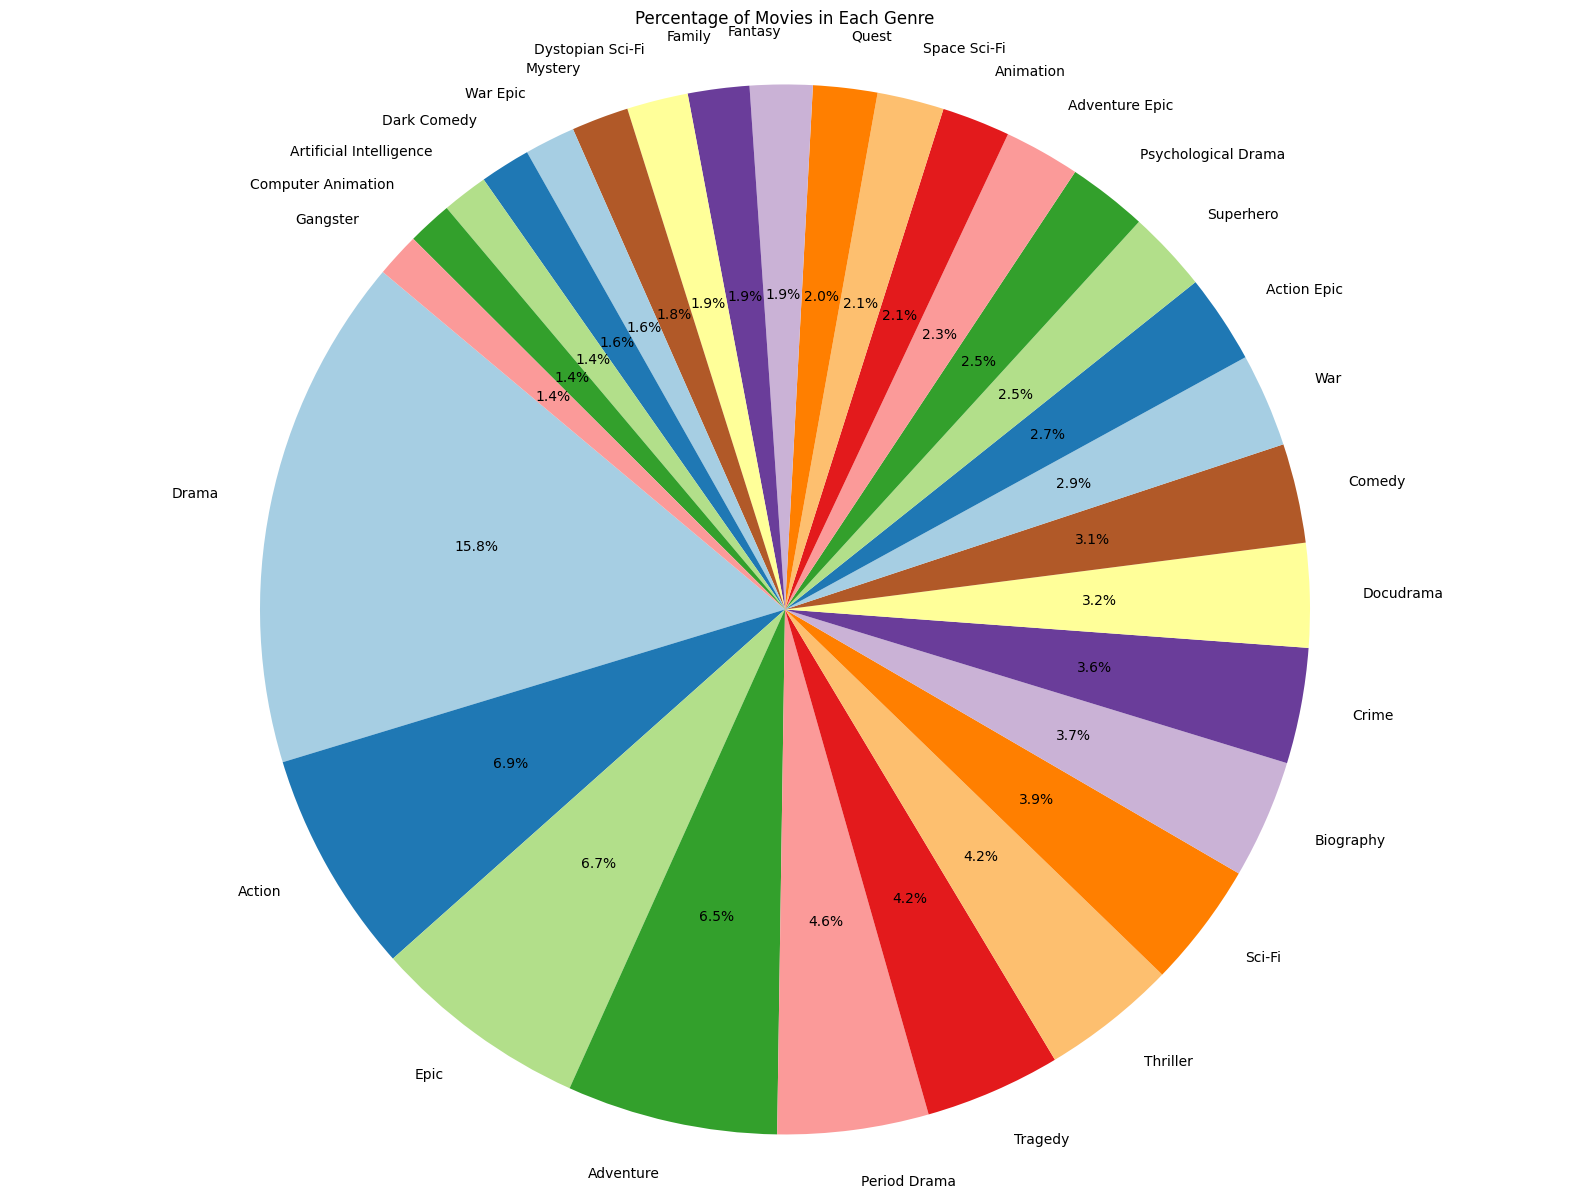

In [39]:
genre_counts = movies_df['genres'].value_counts()
total_movies = genre_counts.sum()
genre_percentage = (genre_counts / total_movies) * 100
filtered_genres = genre_percentage[genre_percentage >= 1]

plt.figure(figsize=(20, 15))
plt.pie(filtered_genres, labels=filtered_genres.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)

plt.title('Percentage of Movies in Each Genre')
plt.axis('equal')  
plt.show()

<h3 style="color:purple"><i><b>💰🎬 Top 20 High-Budget Movies Categorized by Genre</b></i></h3>


In [40]:
high_budget_movies = movies_df.drop_duplicates(subset=['title']).nlargest(20, 'budgets(in millions)')
high_budget_movies

,movie_id,title,directors,Imdb_Ratings,release_year,Runtime,Motion_picture_Rating,budgets(in millions),gross_us_and_canada(in millions),gross_worldwide(in millions),opening_weekend_gross_in_uscanada(in millions),Oscar,wins,nominations,genres,Writers,languages,origin_country,production_companys
9883,74,Avengers: Endgame,Anthony Russo,8.4,2019,2h,UA,356,858,2799,357,1,70,133,Action,Christopher Markus,English,12-Track Digital Sound,Marvel Studios
7981,60,Avengers: Infinity War,Anthony Russo,8.4,2018,2h 29m,UA,321,678,2052,257,1,48,81,Action,Christopher Markus,English,Dolby Atmos,Jason Roberts Productions
8901,70,The Dark Knight Rises,Christopher Nolan,8.4,2012,1h 45m,UA,250,448,1114,160,1,45,103,Action,Christopher Nolan,Arabic,United Kingdom,DC Entertainment
12021,91,Toy Story 3,Lee Unkrich,8.3,2010,1h 55m,U,200,415,1067,110,2,63,96,Adventure,Andrew Stanton,English,United States,Pixar Animation Studios
20836,178,Spider-Man: No Way Home,Jon Watts,8.2,2021,1h 26m,UA,200,814,1952,260,1,35,71,Action,Chris McKenna,English,United States,Columbia Pictures
6685,53,Dune: Part Two,Denis Villeneuve,8.5,2024,2h 46m,UA,190,282,714,82,5,62,318,Action,Denis Villeneuve,English,Canada,Legendary Entertainment
98,2,The Dark Knight,Christopher Nolan,9.0,2008,2h 32m,UA,185,534,1009,158,2,164,165,Action,Christopher Nolan,English,United Kingdom,Legendary Entertainment
7567,57,WALL·E,Andrew Stanton,8.4,2008,1h 38m,U,180,223,527,63,1,96,95,Adventure,Andrew Stanton,English,Japan,FortyFour Studios
9117,71,Coco,Lee Unkrich,8.4,2017,2h 40m,U,175,210,814,50,2,112,42,Adventure,Jason Katz,English,Mexico,Día de Muertos
13269,107,Up,Pete Docter,8.3,2009,2h 8m,U,175,293,735,68,2,81,88,Adventure,Bob Peterson,English,United States,Pixar Animation Studios


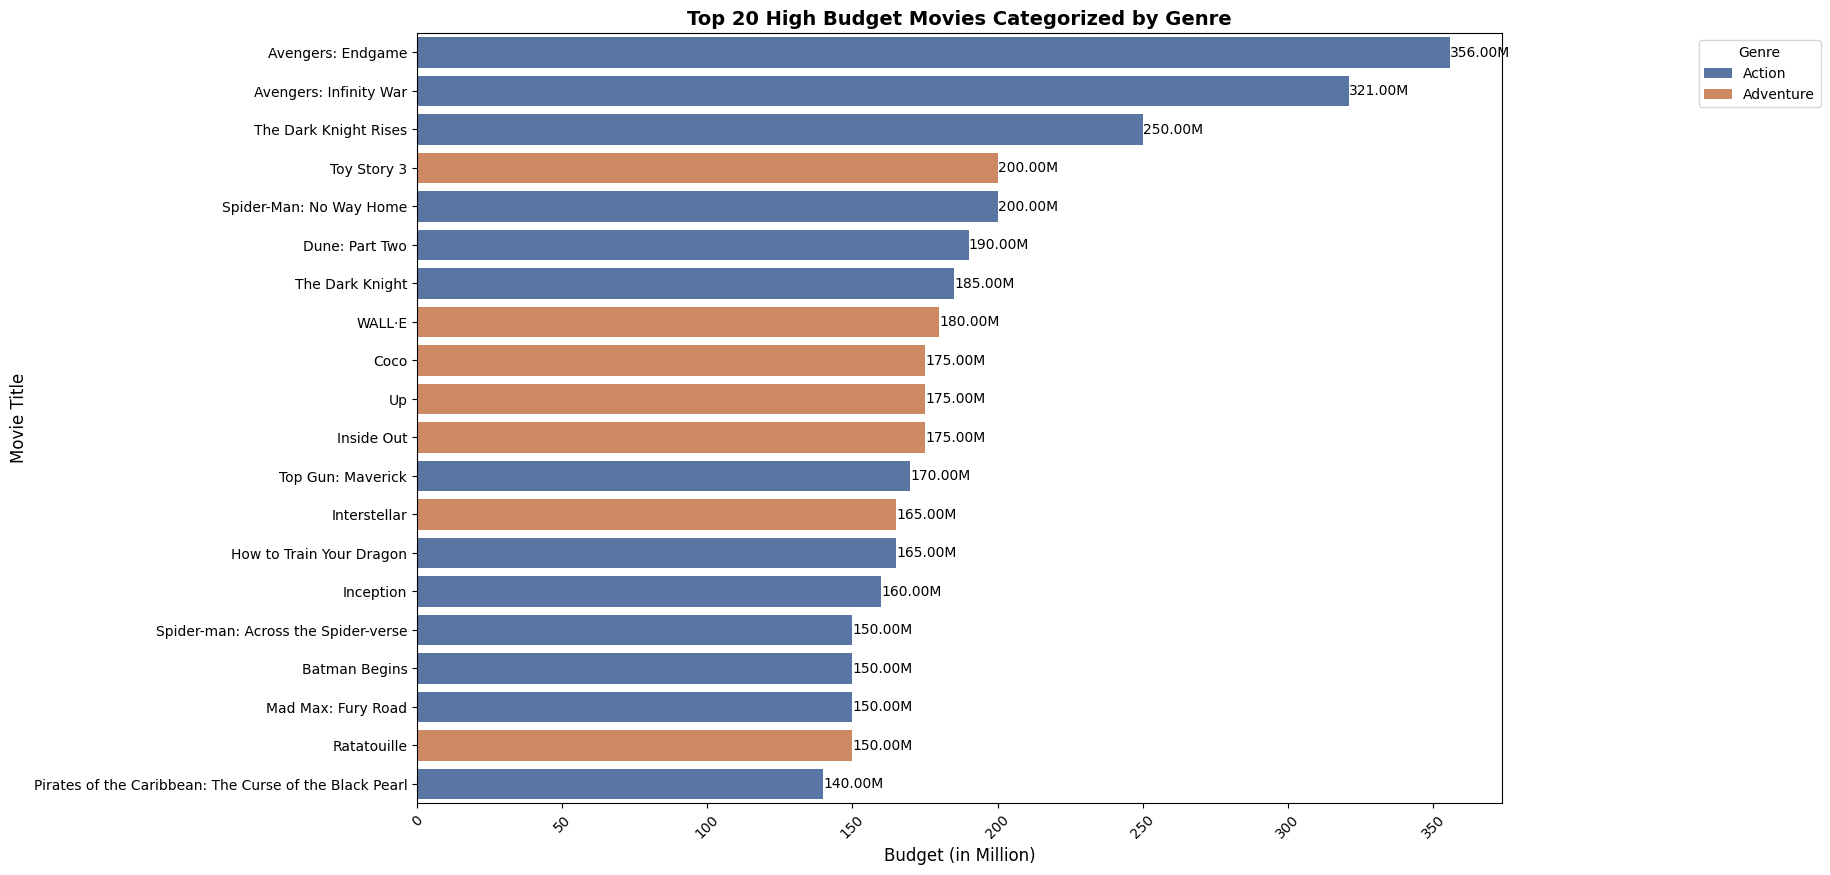

In [41]:
plt.figure(figsize=(14, 10))  
ax = sns.barplot(data=high_budget_movies, y='title', x='budgets(in millions)', hue='genres', palette='deep', orient='h')  
plt.title("Top 20 High Budget Movies Categorized by Genre", fontsize=14, fontweight='bold')
plt.xlabel("Budget (in Million)", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Genre", loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=10) 


for container in ax.containers:
    ax.bar_label(container, fmt='%.2fM', fontsize=10)

plt.show()

<h3 style="color:purple"><i><b>🏆🍿Top 10 Oscar-Winning Movies by Year</b></i></h3>


In [42]:
oscar_wins_yearwise = movies_df.sort_values(by='Oscar', ascending=False).drop_duplicates(subset=['title']).head(10)
oscar_wins_yearwise

,movie_id,title,directors,Imdb_Ratings,release_year,Runtime,Motion_picture_Rating,budgets(in millions),gross_us_and_canada(in millions),gross_worldwide(in millions),opening_weekend_gross_in_uscanada(in millions),Oscar,wins,nominations,genres,Writers,languages,origin_country,production_companys
1114,5,The Lord of the Rings: The Return of the King,Peter Jackson,9.0,2003,3h 21m,U,94,381,1138,72,11,215,124,Sword & Sorcery,J.R.R. Tolkien,Old English,United States,The Saul Zaentz Company
21338,182,Ben-Hur,William Wyler,8.1,1959,3h 5m,U,15,74,74,0,11,29,13,Adventure,Gore Vidal,English,United States,Metro-Goldwyn-Mayer (MGM)
9443,72,Amadeus,Milos Forman,8.4,1984,1h 21m,PG,18,51,52,0,8,43,15,Biography,Peter Shaffer,English,United States,AMLF
18490,158,The Elephant Man,David Lynch,8.2,1980,1h 45m,UA,5,26,0,26,8,11,22,Biography,Eric Bergren,None,United Kingdom,None
18770,162,Gone with the Wind,Victor Fleming,8.2,1939,2h 9m,U,3,200,402,1,8,21,9,War,Sidney Howard,None,Magnaphone Western Electric,None
24138,206,On the Waterfront,Elia Kazan,8.1,1954,1h 32m,A,0,0,0,0,8,30,10,Crime,Budd Schulberg,None,United States,None
14459,111,Oppenheimer,Christopher Nolan,8.3,2023,2h 9m,R,100,329,975,82,7,355,369,Psychological Drama,Martin Sherwin,Dutch,United States,Universal Pictures
7,0,The Shawshank Redemption,Frank Darabont,9.3,1994,2h 22m,A,25,28,29,0,7,21,42,Prison Drama,Stephen King,English,United States,Castle Rock Entertainment
12817,99,Lawrence of Arabia,David Lean,8.3,1962,2h 50m,U,15,45,45,0,7,31,14,War Epic,Michael Wilson,English,United Kingdom,Horizon Pictures (II)
13121,102,Double Indemnity,Billy Wilder,8.3,1944,2h 50m,Approved,0,0,0,0,7,2,9,Film Noir,Billy Wilder,English,United States,Paramount Pictures


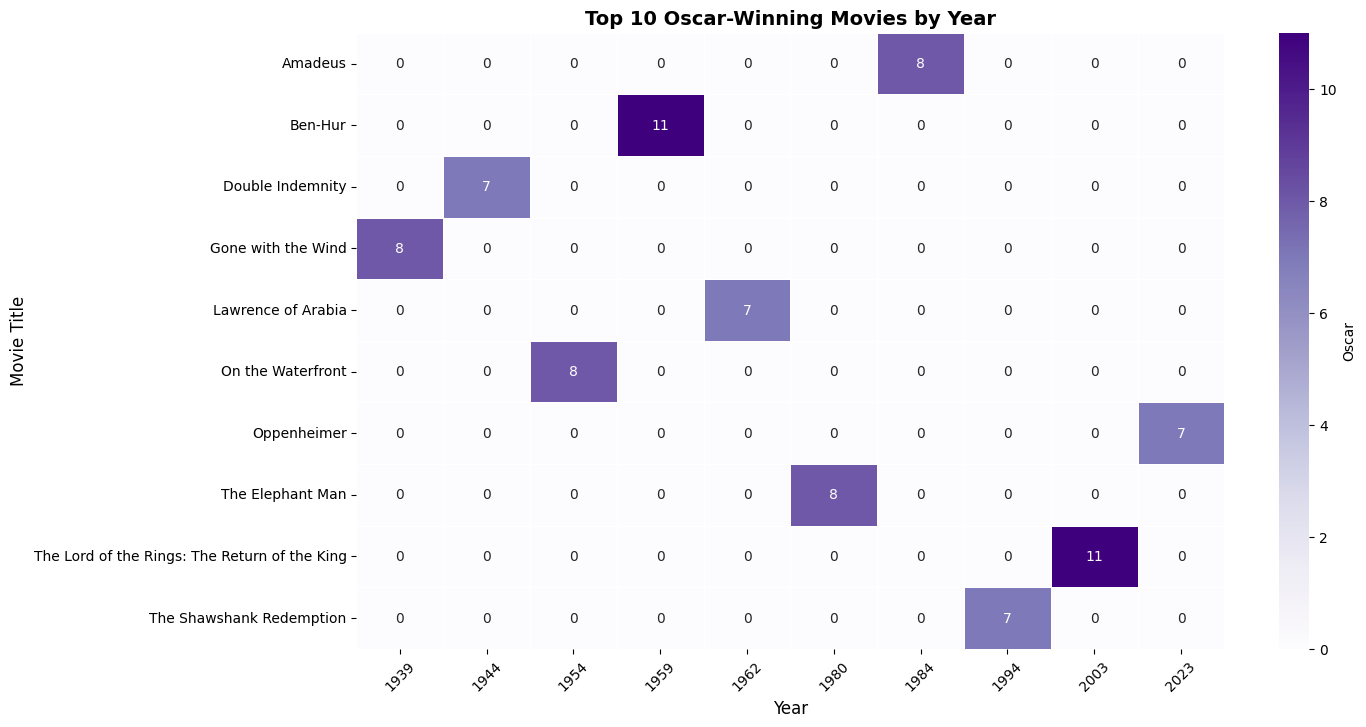

In [43]:
pivot_table = oscar_wins_yearwise.pivot_table(index="title", columns="release_year", values="Oscar", aggfunc="sum", fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Purples", linewidths=0.5, cbar_kws={"label": "Oscar"})
plt.title("Top 10 Oscar-Winning Movies by Year", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0) 
plt.show()


<h3 style="color:purple"><i><b>⭐🎬 IMDB Rating Distribution Across Genres</b></i></h3>

In [44]:
top_movies_genre = df.sort_values(by="Imdb_Ratings", ascending=False).drop_duplicates(subset=["title"]).head(30)

In [45]:
fig = px.strip(
    top_movies_genre, 
    x="genres", 
    y="Imdb_Ratings", 
    hover_data=["title"],
    color="genres"  
)
fig.update_traces(marker=dict(size=12))  
fig.update_layout(
    title="IMDB Rating Distribution Across Genres",
    xaxis_title="Genre",
    yaxis_title="IMDB Rating",
    template="plotly_dark",
    width=900,
    height=600
)
fig.show()


<h3 style="color:purple"><i><b>💰 Top 20 High-Grossing 🎬 Movies Classified by 🏦 Production Companies</b></i></h3>


In [46]:
movies_df["gross_worldwide(in millions)"] = pd.to_numeric(movies_df["gross_worldwide(in millions)"], errors='coerce')
gross_income = movies_df.drop_duplicates(subset=["title"])
gross_income = gross_income.sort_values(by=["gross_worldwide(in millions)"], ascending=False)
gross_income = gross_income.head(20)

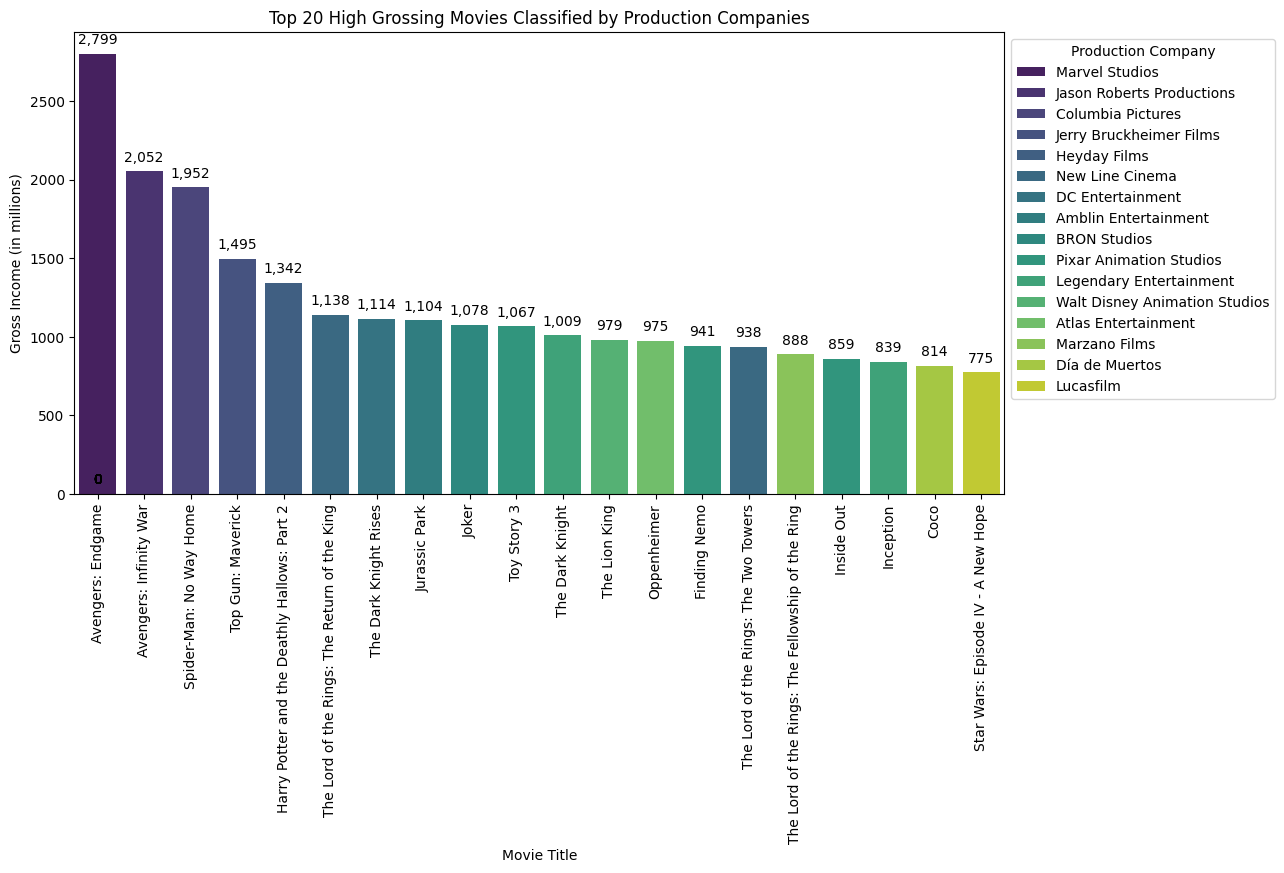

In [47]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=gross_income,
    x="title", 
    y="gross_worldwide(in millions)", 
    hue="production_companys",
    palette="viridis"
)
plt.xlabel("Movie Title")
plt.ylabel("Gross Income (in millions)")
plt.title("Top 20 High Grossing Movies Classified by Production Companies")
plt.xticks(rotation=90)
plt.legend(title="Production Company", bbox_to_anchor=(1, 1))

# Add labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), ",.0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = "center", va = "bottom", fontsize=10, color="black", xytext=(0, 5),
                textcoords="offset points")

plt.show()


<h3 style="color:purple"><i><b>🏆 Top Award-Winning Movies by 🌍 Country</b></i></h3>


In [48]:
awards_data = movies_df.sort_values(by=["wins"], ascending=False).drop_duplicates(subset=["title"]).head(10)

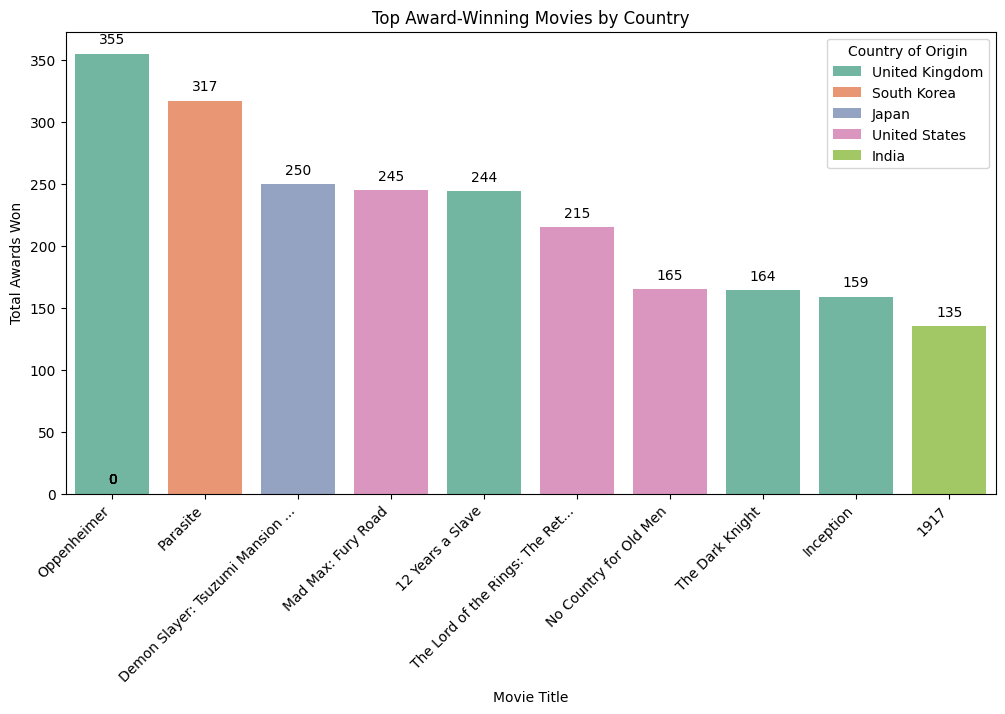

In [49]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=awards_data["title"], 
    y=awards_data["wins"], 
    hue=awards_data["origin_country"], 
    palette="Set2"
)

plt.xlabel("Movie Title")
plt.ylabel("Total Awards Won")
plt.title("Top Award-Winning Movies by Country")
plt.xticks(rotation=45, ha="right", fontsize=10)

# Set correct tick positions before modifying labels
ax.set_xticks(range(len(awards_data["title"])))
ax.set_xticklabels([title[:30] + "..." if len(title) > 30 else title for title in awards_data["title"]])
for p in ax.patches:
    ax.annotate(format(p.get_height(), ",.0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, color="black", xytext=(0, 5),
                textcoords="offset points")
plt.legend(title="Country of Origin", bbox_to_anchor=(1, 1))
plt.show()


<h3 style="color:purple"><i><b>💰 Top Grossing Genres Classified by 🗣️ Language</b></i></h3>


In [50]:
genre_income = movies_df.groupby(["genres", "languages"])["gross_worldwide(in millions)"].sum().reset_index()
genre_income = genre_income.sort_values(by="gross_worldwide(in millions)", ascending=False).drop_duplicates().head(20)

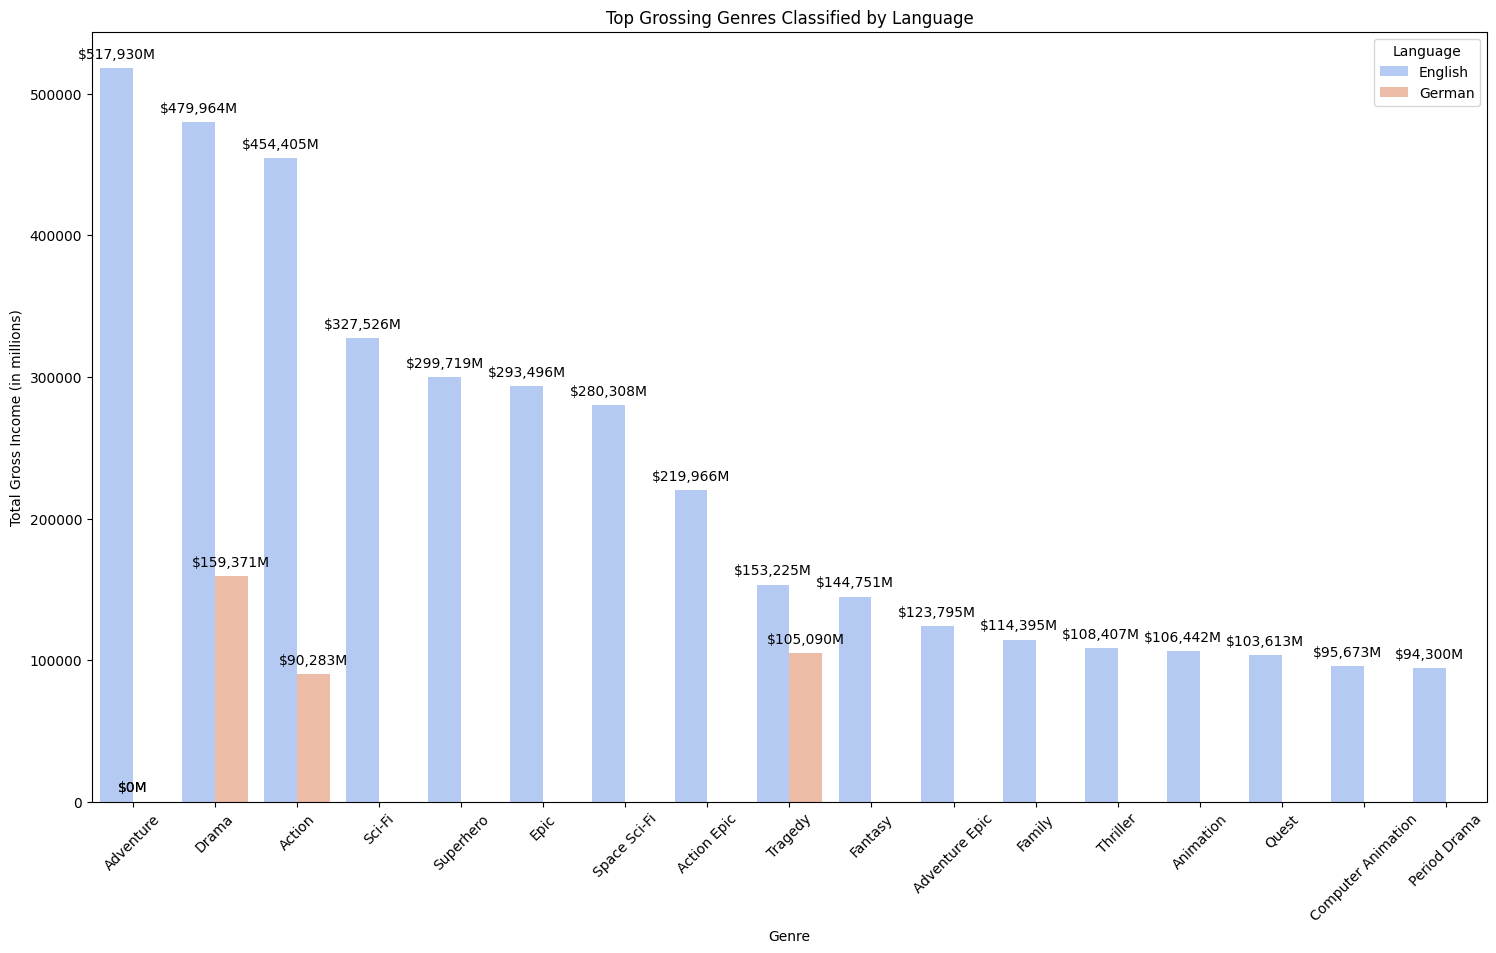

In [51]:

plt.figure(figsize=(18, 10))
ax = sns.barplot(
    data=genre_income,
    x="genres", 
    y="gross_worldwide(in millions)", 
    hue="languages", 
    palette="coolwarm"
)
plt.xlabel("Genre")
plt.ylabel("Total Gross Income (in millions)")
plt.title("Top Grossing Genres Classified by Language")
plt.xticks(rotation=45)
plt.legend(title="Language", bbox_to_anchor=(1, 1))
for p in ax.patches:
    ax.annotate(f"${format(p.get_height(), ',.0f')}M", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, color="black", xytext=(0, 5),
                textcoords="offset points")

plt.show()

<h3 style="color:purple"><i><b>🌐 Top 20 Languages by Total💰 Gross Income</b></i></h3>


In [52]:
language_income = movies_df.drop_duplicates(subset=["languages"]).groupby("languages")["gross_worldwide(in millions)"].sum().reset_index()
language_income = language_income.sort_values(by="gross_worldwide(in millions)", ascending=False).head(20)
language_income

,languages,gross_worldwide(in millions)
30,Old English,1138
35,Quenya,1138
39,Sindarin,1138
27,Mandarin,1009
41,Swahili,979
46,Xhosa,979
48,Zulu,979
6,Dutch,975
26,Latvian,859
19,Japanese,839


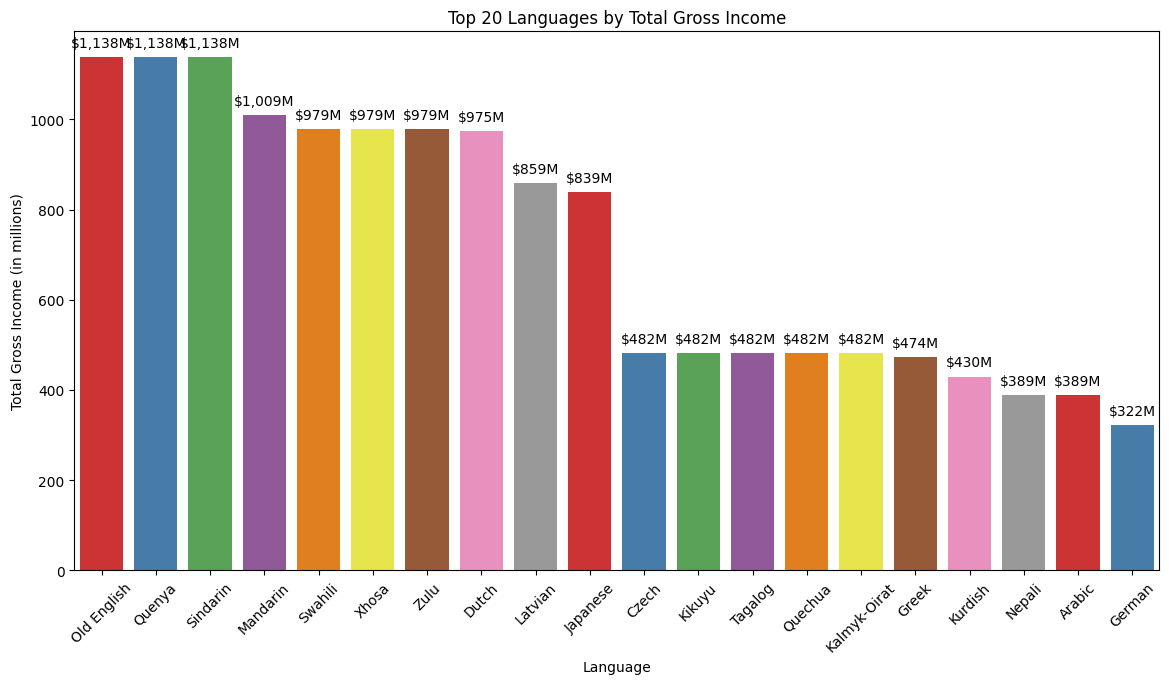

In [53]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=language_income,
    x="languages", 
    y="gross_worldwide(in millions)", 
    hue='languages',
    palette="Set1"
)
plt.xlabel("Language")
plt.ylabel("Total Gross Income (in millions)")
plt.title("Top 20 Languages by Total Gross Income")
plt.xticks(rotation=45)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"${format(p.get_height(), ',.0f')}M", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, color="black", xytext=(0, 5),
                textcoords="offset points")

plt.show()

<h3 style="color:purple"><i><b>🎥 Top 10 Directors by Number of 🎬 Movies Directed</b></i></h3>


In [54]:
# unique_movies_df = movies_df.drop_duplicates(subset=['title', 'directors'])

top_directors = (
    movies_df.groupby('directors')['title']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

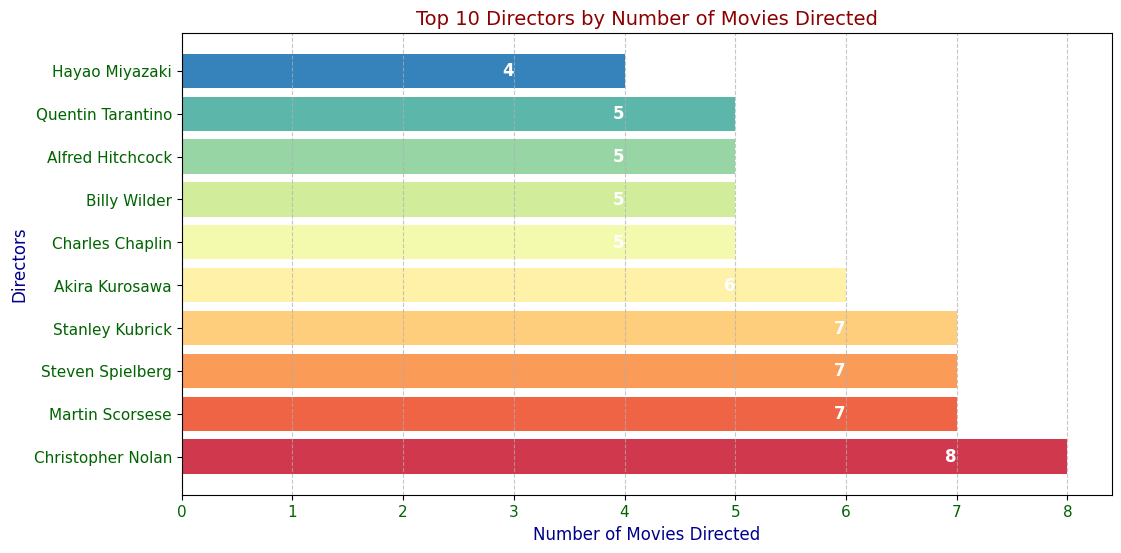

In [55]:
colors = sns.color_palette("Spectral", len(top_directors))

plt.figure(figsize=(12, 6))
bars = plt.barh(top_directors.index, top_directors.values, color=colors)

for bar, value in zip(bars, top_directors.values):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2, 
             str(value), ha='right', va='center', fontsize=12, color='white', fontweight='bold')

plt.xlabel("Number of Movies Directed", color='darkblue', fontsize=12)
plt.ylabel("Directors", color='darkblue', fontsize=12)
plt.title("Top 10 Directors by Number of Movies Directed", color='darkred', fontsize=14)

plt.xticks(color='darkgreen', fontsize=11)
plt.yticks(color='darkgreen', fontsize=11)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<h3 style="color:purple"><i><b>✍️Top 10 Writers by Number of 🎬 Movies Written</b></i></h3>


In [56]:
movies_per_year = movies_df['release_year'].value_counts().sort_index().reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']

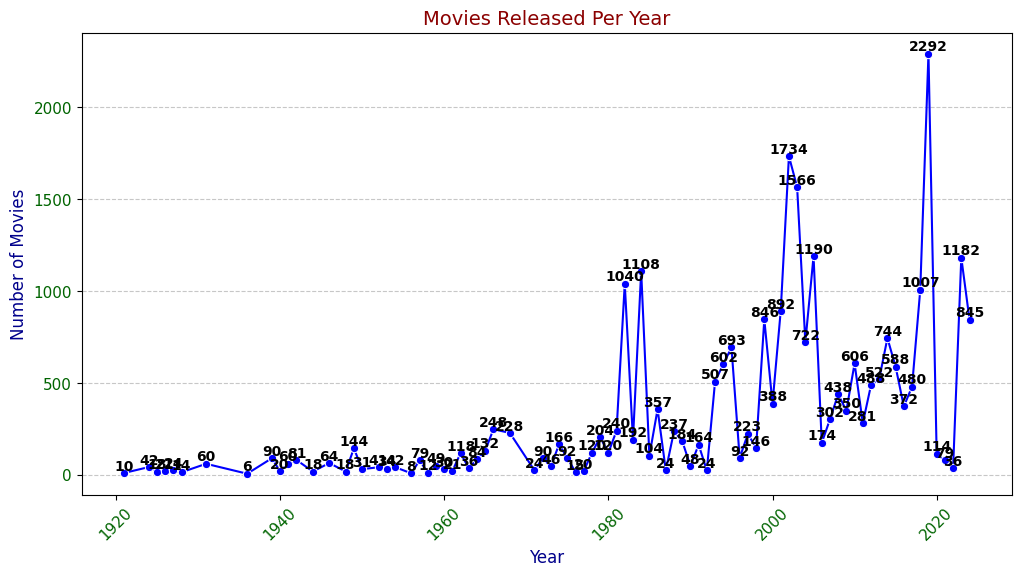

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year['Year'], y=movies_per_year['Number of Movies'], marker='o', color='b')


for x, y in zip(movies_per_year['Year'], movies_per_year['Number of Movies']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Year", color='darkblue', fontsize=12)
plt.ylabel("Number of Movies", color='darkblue', fontsize=12)
plt.title("Movies Released Per Year", color='darkred', fontsize=14)

# Grid and styling
plt.xticks(rotation=45, color='darkgreen', fontsize=11)
plt.yticks(color='darkgreen', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h3 style="color:purple"><i><b>🎞️Top 20 Movies Based on⭐ Rating Classified by ⏳ Runtime</b></i></h3>


In [58]:

top_movies = movies_df.drop_duplicates(subset=['title']).nlargest(20, 'Imdb_Ratings')

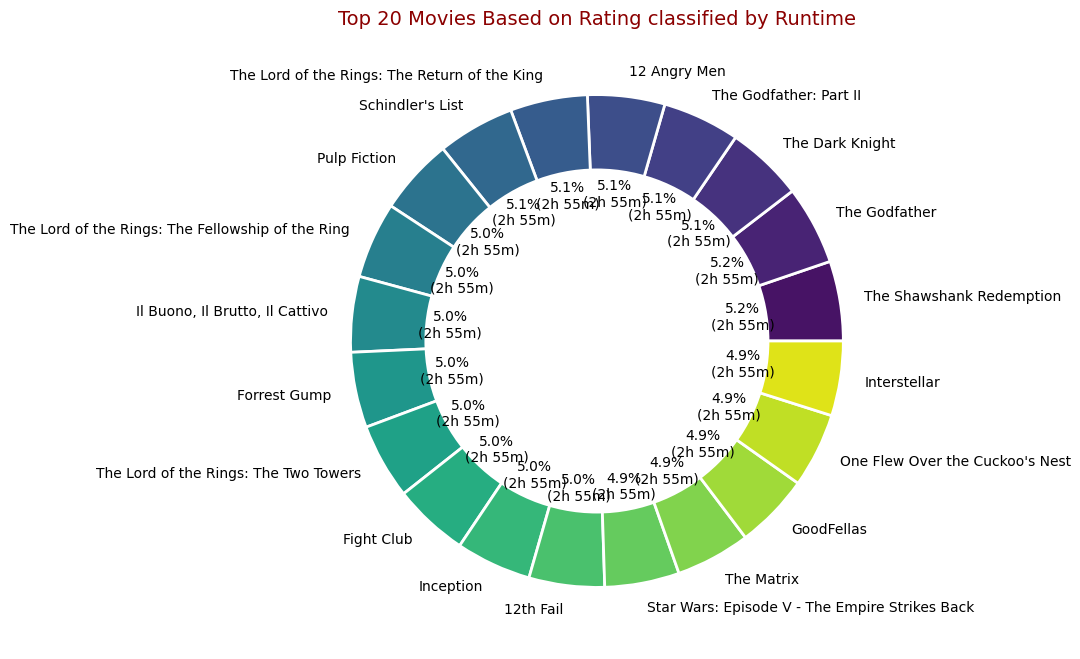

In [59]:
colors = sns.color_palette("viridis", len(top_movies))

# Function to format percentage with the correct runtime
def autopct_format(pct, runtimes, index):
    return f'{pct:.1f}%\n({runtimes[index]})'  # Show only the corresponding runtime

# Create the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_movies['Imdb_Ratings'], 
    labels=top_movies['title'], 
    autopct=lambda p: autopct_format(p, top_movies["Runtime"].tolist(), 
                                     int(round((p / 100) * (len(top_movies) - 1)))),  # Match runtime to each slice
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Create a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Title and styling
plt.title("Top 20 Movies Based on Rating classified by Runtime", fontsize=14, color='darkred')
plt.show()